<a href="https://colab.research.google.com/github/kryssiamendonca/data-driven-insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
caminho = '/content/drive/MyDrive/projetos/sales_data_sample.csv'


In [38]:
import pandas as pd

caminho = '/content/drive/MyDrive/projetos/sales_data_sample.csv'

# Tenta com codificação ISO-8859-1
df = pd.read_csv(caminho, encoding='ISO-8859-1')

df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [39]:
#ESTRUTURA

# Tipos de dados e colunas
df.info()

# Estatísticas descritivas
df.describe(include='all')

# Verificar valores ausentes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


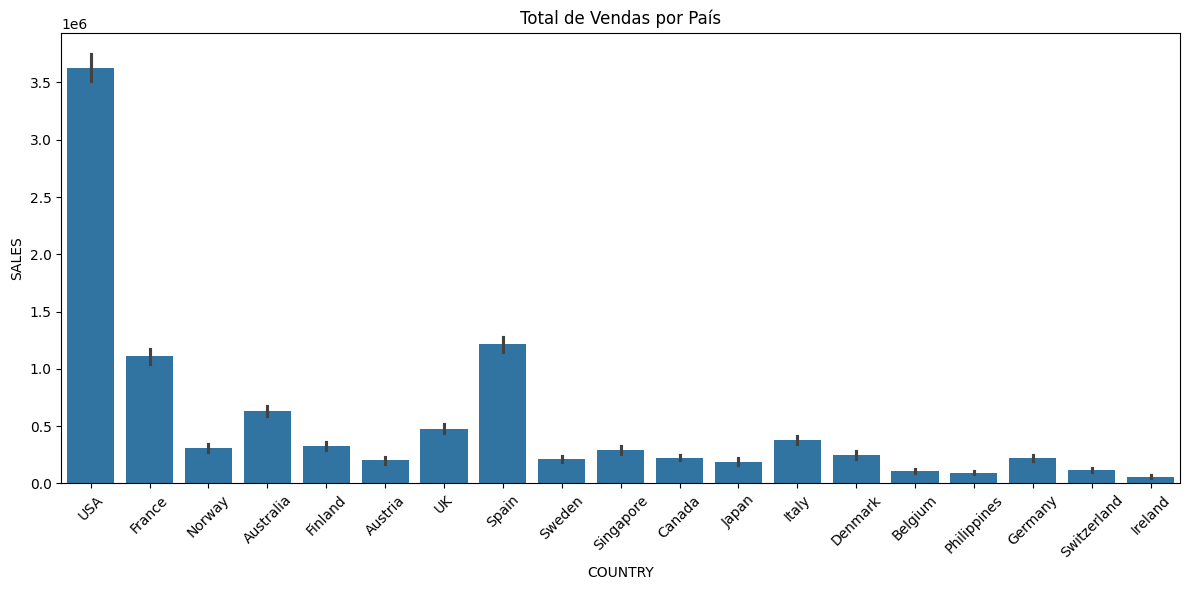

In [40]:
#Insights Visual

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='COUNTRY', y='SALES', estimator=sum)
plt.xticks(rotation=45)
plt.title('Total de Vendas por País')
plt.tight_layout()
plt.show()


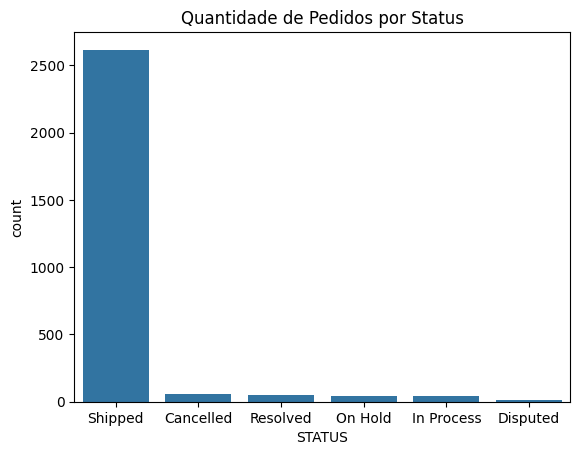

In [41]:
#Quantidade de Pedidos por status

sns.countplot(data=df, x='STATUS', order=df['STATUS'].value_counts().index)
plt.title('Quantidade de Pedidos por Status')
plt.show()


In [42]:
import numpy as np

sales_array = df['SALES'].values  # ou np.array(df['SALES'])


In [43]:
print("Média das vendas:", np.mean(sales_array))
print("Mediana das vendas:", np.median(sales_array))
print("Desvio padrão:", np.std(sales_array))
print("Valor máximo:", np.max(sales_array))
print("Valor mínimo:", np.min(sales_array))


Média das vendas: 3553.889071909316
Mediana das vendas: 3184.8
Desvio padrão: 1841.5388520655404
Valor máximo: 14082.8
Valor mínimo: 482.13


In [44]:
acima_da_media = sales_array[sales_array > np.mean(sales_array)]
print("Número de vendas acima da média:", len(acima_da_media))


Número de vendas acima da média: 1168


In [45]:
tickets = df['SALES'].values / df['QUANTITYORDERED'].values
print("Ticket médio geral:", np.mean(tickets))


Ticket médio geral: 101.15943987929258


In [46]:
# Usando o valor médio para definir o corte
media_vendas = df['SALES'].mean()

# Função simples com if/else
def classificar_venda(valor):
    if valor >= media_vendas:
        return 'Alta'
    else:
        return 'Baixa'

# Aplicar no DataFrame
df['CLASSIFICACAO_VENDA'] = df['SALES'].apply(classificar_venda)

df[['SALES', 'CLASSIFICACAO_VENDA']].head()


,SALES,CLASSIFICACAO_VENDA
0,2871.00,Baixa
1,2765.90,Baixa
2,3884.34,Alta
3,3746.70,Alta
4,5205.27,Alta


In [47]:
import numpy as np

df['CLASSIFICACAO_VENDA'] = np.where(df['SALES'] >= media_vendas, 'Alta', 'Baixa')


In [48]:
df['ALERTA'] = np.where(df['SALES'] < 500, '⚠️ Abaixo do esperado', '')



In [49]:
df['CLASSIFICACAO_VENDA'].value_counts()


,count
CLASSIFICACAO_VENDA,
Baixa,1655
Alta,1168


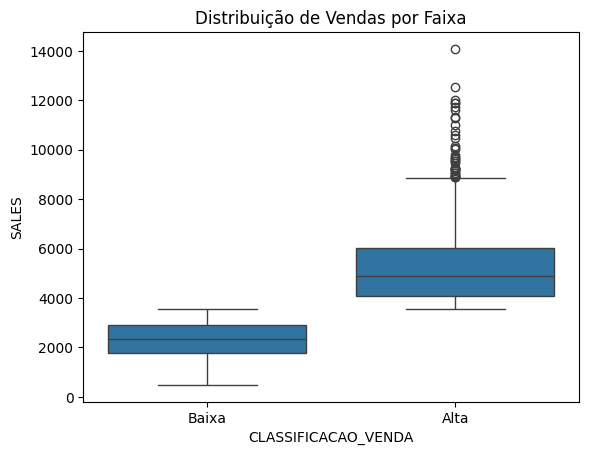

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='CLASSIFICACAO_VENDA', y='SALES')
plt.title('Distribuição de Vendas por Faixa')
plt.show()
